# **SC1015 ECDS1 Group 6 Mini Project**





## **Gold Price Prediction**




*   To explore the relationship between different commodities/indexes.
*   To find out which commodity/index serves as the best predictor for **Gold** price.



## **Essential Libraries**

In [197]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

## **Dataset**

The dataset chosen is from Kaggle: "2019-2024 US Stock Market Data"
https://www.kaggle.com/datasets/saketk511/2019-2024-us-stock-market-data



---


**Date:** The date of the recorded data, formatted as DD-MM-YYYY.    
**Natural_Gas_Price:** Price of natural gas in USD per million British thermal units (MMBtu).                                             
**Natural_Gas_Vol.:** Trading volume of natural gas.   
**Crude_oil_Price:** Price of crude oil in USD per barrel.  
**Crude_oil_Vol.:** Trading volume of crude oil.  
**Copper_Price:** Price of copper in USD per pound.   
**Copper_Vol.:** Trading volume of copper.      
**Bitcoin_Price:** Price of Bitcoin in USD.      
**Bitcoin_Vol.:** Trading volume of Bitcoin.     
**Platinum_Price:** Price of platinum in USD per troy ounce.  
**Platinum_Vol.:** Trading volume of platinum.   
**Ethereum_Price:** Price of Ethereum in USD.     
**Ethereum_Vol.:** Trading volume of Ethereum.    
**S&P_500_Price:** Price index of the S&P 500.     
**Nasdaq_100_Price**: Price index of the Nasdaq 100.     
**Nasdaq_100_Vol.:** Trading volume for the Nasdaq 100 index.   
**Apple_Price:** Stock price of Apple Inc. in USD.     
**Apple_Vol.:** Trading volume of Apple Inc. stock.   
**Tesla_Price:** Stock price of Tesla Inc. in USD.    
**Tesla_Vol.:** Trading volume of Tesla Inc. stock.    
**Microsoft_Price:** Stock price of Microsoft Corporation in USD.      
**Microsoft_Vol.:** Trading volume of Microsoft Corporation stock.  
**Silver_Price:** Price of silver in USD per troy ounce.    
**Silver_Vol.:** Trading volume of silver.   
**Google_Price:** Stock price of Alphabet Inc. (Google) in USD.      
**Google_Vol.:** Trading volume of Alphabet Inc. stock.    
**Nvidia_Price:** Stock price of Nvidia Corporation in USD.
**Nvidia_Vol.:** Trading volume of Nvidia Corporation stock.   
**Berkshire_Price:** Stock price of Berkshire Hathaway Inc. in USD.     
**Berkshire_Vol.:** Trading volume of Berkshire Hathaway Inc. stock.   
**Netflix_Price:** Stock price of Netflix Inc. in USD.     
**Netflix_Vol.:** Trading volume of Netflix Inc. stock.    
**Amazon_Price:** Stock price of Amazon.com Inc. in USD.     
**Amazon_Vol.:** Trading volume of Amazon.com Inc. stock.    
**Meta_Price:** Stock price of Meta Platforms, Inc. (formerly Facebook) in USD.   
**Meta_Vol.:** Trading volume of Meta Platforms, Inc. stock.   
**Gold_Price:** Price of gold in USD per troy ounce.     
**Gold_Vol.:** Trading volume of gold.

In [198]:
# Importing the dataset
stocks = pd.read_csv('Stock Market Dataset.csv')
stocks.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


Overview of Dataset

In [199]:
print("Data type:\t", type(stocks))
print("Data dims:\t", stocks.shape)

Data type:	 <class 'pandas.core.frame.DataFrame'>
Data dims:	 (1243, 39)


In [200]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1243 non-null   int64  
 1   Date               1243 non-null   object 
 2   Natural_Gas_Price  1243 non-null   float64
 3   Natural_Gas_Vol.   1239 non-null   float64
 4   Crude_oil_Price    1243 non-null   float64
 5   Crude_oil_Vol.     1220 non-null   float64
 6   Copper_Price       1243 non-null   float64
 7   Copper_Vol.        1206 non-null   float64
 8   Bitcoin_Price      1243 non-null   object 
 9   Bitcoin_Vol.       1243 non-null   float64
 10  Platinum_Price     1243 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1243 non-null   object 
 13  Ethereum_Vol.      1243 non-null   float64
 14  S&P_500_Price      1243 non-null   object 
 15  Nasdaq_100_Price   1243 non-null   object 
 16  Nasdaq_100_Vol.    1242 

## **Data Preparation and Cleaning**

Check for duplicates entries on the same date.

In [201]:
print("Number of entries:\t\t", len(stocks))
print("Number of unique entries:\t", len(stocks["Date"].unique()))

Number of entries:		 1243
Number of unique entries:	 1243


This shows that our data does not have duplicate entries on the same date.

We drop the `Unnamed: 0` column as it is unnecessary.


In [202]:
stocks = stocks.drop(['Unnamed: 0'], axis=1)
stocks

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,08-02-2019,2.583,147880.0,52.72,621000.0,2.8140,270.0,"3,661.70",699230.0,802.2,...,"3,00,771",240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0,"1,318.50",150610.0
1239,07-02-2019,2.551,211790.0,52.64,749010.0,2.8320,320.0,"3,397.70",471360.0,800.8,...,"3,02,813",240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0,"1,314.20",166760.0
1240,06-02-2019,2.662,98330.0,54.01,606720.0,2.8400,100.0,"3,404.30",514210.0,807.1,...,"3,08,810",120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0,"1,314.40",137250.0
1241,05-02-2019,2.662,82250.0,53.66,609760.0,2.8205,90.0,"3,468.40",460950.0,821.35,...,"3,10,700",360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0,"1,319.20",129010.0


We now check for the null values in our data.

In [203]:
stocks.isnull().sum()

Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        607
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           47
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
dtype: int64

Since the null values only exist in the `Vol.` columns, we can just remove them because we are only interested in using the `Price` to predict the `Gold_Price`.

In [204]:
# New dataframe with prices only

stocks_price = stocks[["Date", "Natural_Gas_Price", "Crude_oil_Price", "Copper_Price", "Bitcoin_Price", "Platinum_Price", "Ethereum_Price", "S&P_500_Price", "Nasdaq_100_Price", "Apple_Price", "Tesla_Price", "Microsoft_Price", "Silver_Price", "Google_Price", "Nvidia_Price", "Berkshire_Price", "Netflix_Price", "Amazon_Price", "Meta_Price", "Gold_Price"]]
stocks_price.head()

,Date,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Bitcoin_Price,Platinum_Price,Ethereum_Price,S&P_500_Price,Nasdaq_100_Price,Apple_Price,Tesla_Price,Microsoft_Price,Silver_Price,Google_Price,Nvidia_Price,Berkshire_Price,Netflix_Price,Amazon_Price,Meta_Price,Gold_Price
0,02-02-2024,2.079,72.28,3.8215,"43,194.70",901.6,"2,309.28","4,958.61","17,642.73",185.85,187.91,411.22,22.796,142.38,661.60,"5,89,498",564.64,171.81,474.99,"2,053.70"
1,01-02-2024,2.050,73.82,3.8535,"43,081.40",922.3,"2,304.28","4,906.19","17,344.71",186.86,188.86,403.78,23.236,141.16,630.27,"5,81,600",567.51,159.28,394.78,"2,071.10"
2,31-01-2024,2.100,75.85,3.9060,"42,580.50",932.6,"2,283.14","4,848.87","17,137.24",184.40,187.29,397.58,23.169,140.10,615.27,"5,78,020",564.11,155.20,390.14,"2,067.40"
3,30-01-2024,2.077,77.82,3.9110,"42,946.20",931.7,"2,343.11","4,924.97","17,476.71",188.04,191.59,408.59,23.225,151.46,627.74,"5,84,680",562.85,159.00,400.06,"2,050.90"
4,29-01-2024,2.490,76.78,3.8790,"43,299.80",938.3,"2,317.79","4,927.93","17,596.27",191.73,190.93,409.72,23.134,153.51,624.65,"5,78,800",575.79,161.26,401.02,"2,034.90"


In [205]:
stocks_price.isnull().sum()

Date                 0
Natural_Gas_Price    0
Crude_oil_Price      0
Copper_Price         0
Bitcoin_Price        0
Platinum_Price       0
Ethereum_Price       0
S&P_500_Price        0
Nasdaq_100_Price     0
Apple_Price          0
Tesla_Price          0
Microsoft_Price      0
Silver_Price         0
Google_Price         0
Nvidia_Price         0
Berkshire_Price      0
Netflix_Price        0
Amazon_Price         0
Meta_Price           0
Gold_Price           0
dtype: int64

Now that we have no more null values in our dataset, we are all set!

## **Exploratory Data Analysis and Visualisation**

### **Response Variable: Gold_Price**

In [206]:
goldprice = pd.DataFrame(stocks_price[["Date", "Gold_Price"]])
goldprice

,Date,Gold_Price
0,02-02-2024,"2,053.70"
1,01-02-2024,"2,071.10"
2,31-01-2024,"2,067.40"
3,30-01-2024,"2,050.90"
4,29-01-2024,"2,034.90"
...,...,...
1238,08-02-2019,"1,318.50"
1239,07-02-2019,"1,314.20"
1240,06-02-2019,"1,314.40"
1241,05-02-2019,"1,319.20"


In [207]:
goldprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        1243 non-null   object
 1   Gold_Price  1243 non-null   object
dtypes: object(2)
memory usage: 19.5+ KB


We need to convert `Gold_Price` into float first.

In [208]:
goldprice['Gold_Price'] = goldprice['Gold_Price'].str.replace(',', '').astype(float)
goldprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1243 non-null   object 
 1   Gold_Price  1243 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.5+ KB


We have succesfully converted `Gold_Price` into data type float.

In [209]:
goldprice.describe()

,Gold_Price
count,1243.000000
mean,1759.246742
std,203.258901
min,1272.000000
25%,1669.600000
50%,1804.200000
75%,1912.800000
max,2089.700000


<Axes: xlabel='Date'>

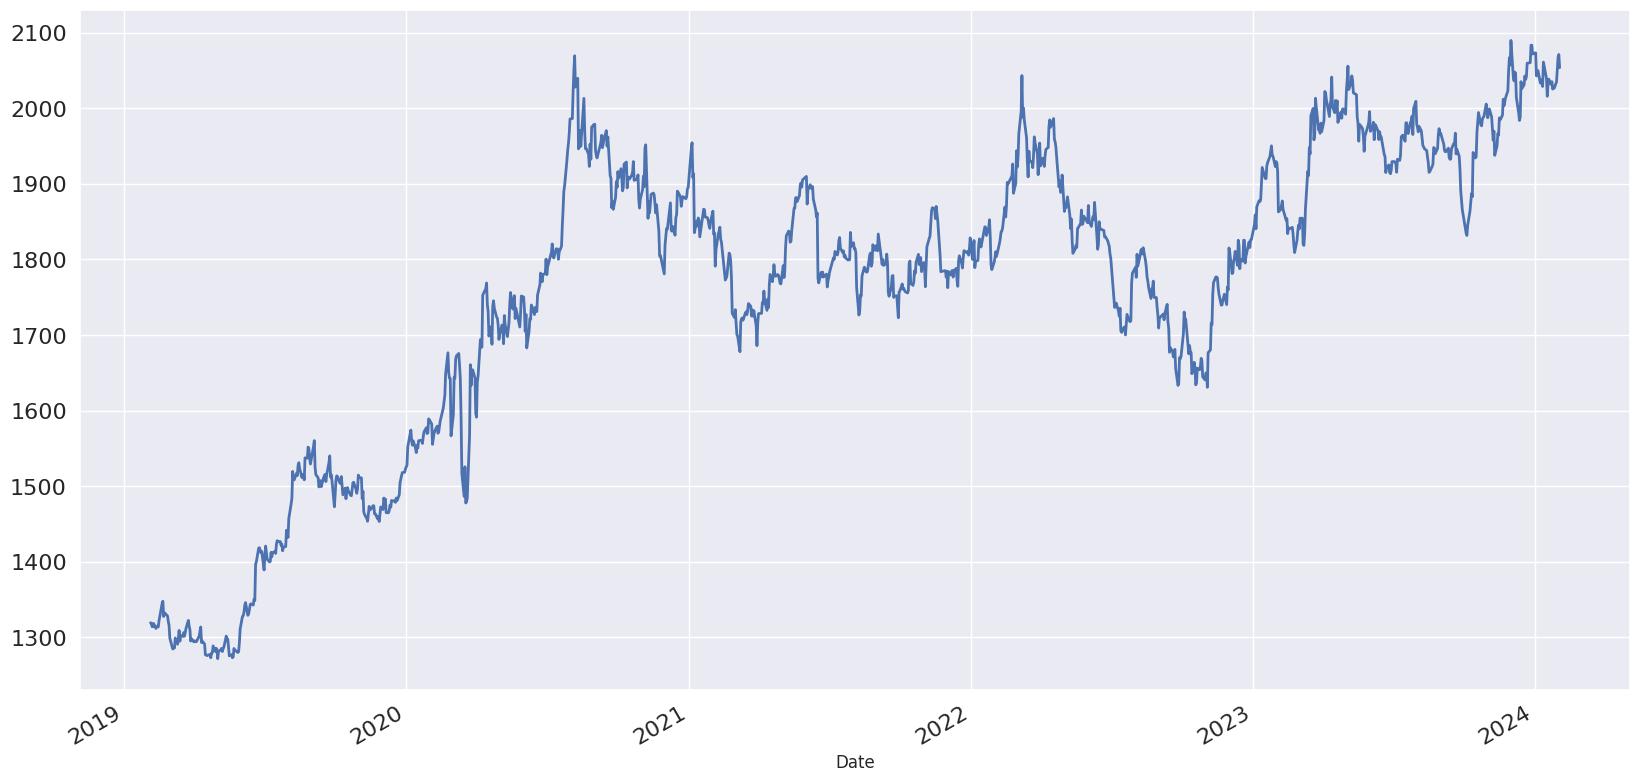

In [210]:
goldprice.index = pd.to_datetime(goldprice.Date, format="%d-%m-%Y")
goldprice["Gold_Price"].plot(figsize=(20,10), linewidth=2, fontsize=16)

This time series plot gives us a clearer picture of the movement of `Gold_Price` over time.

### **Predictor Variables**

In [211]:
predictorprices = stocks_price[["Date", "Natural_Gas_Price", "Crude_oil_Price", "Copper_Price", "Bitcoin_Price", "Platinum_Price", "Ethereum_Price", "S&P_500_Price", "Nasdaq_100_Price", "Apple_Price", "Tesla_Price", "Microsoft_Price", "Silver_Price", "Google_Price", "Nvidia_Price", "Berkshire_Price", "Netflix_Price", "Amazon_Price", "Meta_Price", "Gold_Price"]]
predictorprices

,Date,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Bitcoin_Price,Platinum_Price,Ethereum_Price,S&P_500_Price,Nasdaq_100_Price,Apple_Price,Tesla_Price,Microsoft_Price,Silver_Price,Google_Price,Nvidia_Price,Berkshire_Price,Netflix_Price,Amazon_Price,Meta_Price,Gold_Price
0,02-02-2024,2.079,72.28,3.8215,"43,194.70",901.6,"2,309.28","4,958.61","17,642.73",185.85,187.91,411.22,22.796,142.38,661.60,"5,89,498",564.64,171.81,474.99,"2,053.70"
1,01-02-2024,2.050,73.82,3.8535,"43,081.40",922.3,"2,304.28","4,906.19","17,344.71",186.86,188.86,403.78,23.236,141.16,630.27,"5,81,600",567.51,159.28,394.78,"2,071.10"
2,31-01-2024,2.100,75.85,3.9060,"42,580.50",932.6,"2,283.14","4,848.87","17,137.24",184.40,187.29,397.58,23.169,140.10,615.27,"5,78,020",564.11,155.20,390.14,"2,067.40"
3,30-01-2024,2.077,77.82,3.9110,"42,946.20",931.7,"2,343.11","4,924.97","17,476.71",188.04,191.59,408.59,23.225,151.46,627.74,"5,84,680",562.85,159.00,400.06,"2,050.90"
4,29-01-2024,2.490,76.78,3.8790,"43,299.80",938.3,"2,317.79","4,927.93","17,596.27",191.73,190.93,409.72,23.134,153.51,624.65,"5,78,800",575.79,161.26,401.02,"2,034.90"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,08-02-2019,2.583,52.72,2.8140,"3,661.70",802.2,119.23,"2,707.88","6,913.13",42.60,20.39,105.67,15.809,55.12,37.04,"3,00,771",347.57,79.41,167.33,"1,318.50"
1239,07-02-2019,2.551,52.64,2.8320,"3,397.70",800.8,104.55,"2,706.05","6,904.98",42.73,20.50,105.27,15.713,55.30,36.85,"3,02,813",344.71,80.72,166.38,"1,314.20"
1240,06-02-2019,2.662,54.01,2.8400,"3,404.30",807.1,104.63,"2,731.61","6,997.62",43.56,21.15,106.03,15.701,56.14,38.25,"3,08,810",352.19,82.01,170.49,"1,314.40"
1241,05-02-2019,2.662,53.66,2.8205,"3,468.40",821.35,107.37,"2,737.70","7,023.52",43.55,21.42,107.22,15.836,57.59,37.49,"3,10,700",355.81,82.94,171.16,"1,319.20"


In [212]:
predictorprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1243 non-null   object 
 1   Natural_Gas_Price  1243 non-null   float64
 2   Crude_oil_Price    1243 non-null   float64
 3   Copper_Price       1243 non-null   float64
 4   Bitcoin_Price      1243 non-null   object 
 5   Platinum_Price     1243 non-null   object 
 6   Ethereum_Price     1243 non-null   object 
 7   S&P_500_Price      1243 non-null   object 
 8   Nasdaq_100_Price   1243 non-null   object 
 9   Apple_Price        1243 non-null   float64
 10  Tesla_Price        1243 non-null   float64
 11  Microsoft_Price    1243 non-null   float64
 12  Silver_Price       1243 non-null   float64
 13  Google_Price       1243 non-null   float64
 14  Nvidia_Price       1243 non-null   float64
 15  Berkshire_Price    1243 non-null   object 
 16  Netflix_Price      1243 

In [213]:
# List of columns to convert to float
non_float_columns = ['Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price', 'S&P_500_Price',
                     'Nasdaq_100_Price', 'Berkshire_Price', 'Gold_Price']

# Convert non-float columns to float
for column in non_float_columns:
    predictorprices[column] = predictorprices[column].str.replace(',', '').astype(float)


In [214]:
predictorprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1243 non-null   object 
 1   Natural_Gas_Price  1243 non-null   float64
 2   Crude_oil_Price    1243 non-null   float64
 3   Copper_Price       1243 non-null   float64
 4   Bitcoin_Price      1243 non-null   float64
 5   Platinum_Price     1243 non-null   float64
 6   Ethereum_Price     1243 non-null   float64
 7   S&P_500_Price      1243 non-null   float64
 8   Nasdaq_100_Price   1243 non-null   float64
 9   Apple_Price        1243 non-null   float64
 10  Tesla_Price        1243 non-null   float64
 11  Microsoft_Price    1243 non-null   float64
 12  Silver_Price       1243 non-null   float64
 13  Google_Price       1243 non-null   float64
 14  Nvidia_Price       1243 non-null   float64
 15  Berkshire_Price    1243 non-null   float64
 16  Netflix_Price      1243 

In [215]:
predictorprices.describe()

,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Bitcoin_Price,Platinum_Price,Ethereum_Price,S&P_500_Price,Nasdaq_100_Price,Apple_Price,Tesla_Price,Microsoft_Price,Silver_Price,Google_Price,Nvidia_Price,Berkshire_Price,Netflix_Price,Amazon_Price,Meta_Price,Gold_Price
count,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000
mean,3.494714,67.577064,3.541957,25241.903057,959.003620,1445.815133,3793.322542,12037.318101,125.566533,173.590442,241.240072,21.588977,99.670829,187.285841,404273.051488,404.839541,128.683234,239.728134,1759.246742
std,1.822540,20.465500,0.702819,16029.009055,108.012849,1160.674814,632.321579,2887.069742,46.114122,106.688094,73.429838,3.859288,29.766893,134.679941,86369.903899,114.989473,30.808631,71.015427,203.258901
min,1.482000,-37.630000,2.100500,3397.700000,595.200000,104.550000,2237.400000,6904.980000,42.360000,11.930000,105.250000,11.772000,51.940000,33.450000,240000.000000,166.370000,79.410000,88.910000,1272.000000
25%,2.347500,55.095000,2.858750,10014.600000,889.775000,244.080000,3190.640000,9298.730000,79.505000,53.335000,182.525000,17.998500,71.185000,73.905000,318984.500000,323.010000,96.260000,183.355000,1669.600000
50%,2.702000,69.230000,3.666000,23055.100000,944.700000,1552.600000,3932.690000,12381.170000,136.760000,202.070000,245.380000,22.758000,101.240000,151.590000,418349.000000,384.150000,128.730000,224.430000,1804.200000
75%,4.055500,80.455000,4.137250,37784.200000,1020.400000,2056.555000,4349.240000,14563.250000,162.915000,251.470000,297.120000,24.512000,127.205000,242.140000,471500.000000,495.365000,158.110000,301.650000,1912.800000
max,9.647000,123.700000,4.937500,67527.900000,1297.100000,4808.380000,4958.610000,17642.730000,198.110000,409.970000,411.220000,29.418000,153.510000,661.600000,589498.000000,691.690000,186.570000,474.990000,2089.700000


We now want to find out which variables are the best predictors by looking at their correlation with `Gold_Price`.

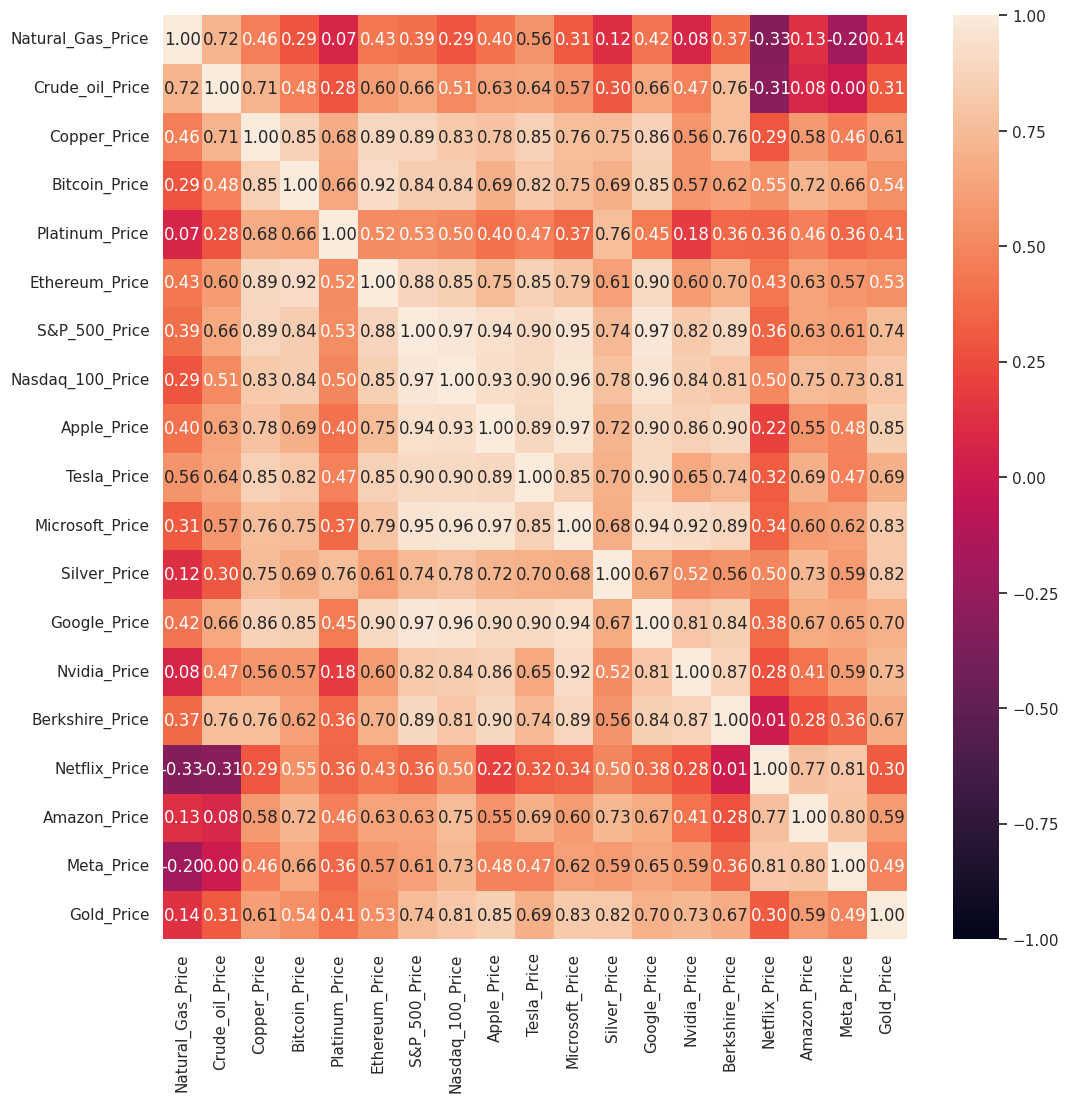

In [216]:
predictorprices_no_date = predictorprices.drop(columns=['Date'])

# Calculate the correlation matrix
corr_matrix = predictorprices_no_date.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 12))
sb.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.show()

From the correlation matrix, we can see that they are a few predictors that have high correlation with `Gold_Price`. However, they are a few more factors that we take into consideration when choosing our predictors.


*   Firstly, we rule out the commodity assest class, which is `Natural_Gas_Price` and `Crude_oil_price` because they have very low correlation with `Gold_Price`.
*   We will pick one predictor from each of the three assest classes which seem to have high correlation with `Gold_Price` to compare so that we do not "overcommit" to one assest class.
*   The predictors we chose are:

      1.   `Nasdaq_100_Price` (Asset Class: Market Performance Index)
      2.   `Apple_Price` (Assest Class: Techonology Stocks)
      3.   `Silver_Price` (Assest Class: Metal)

In [217]:
predictorprices_final = predictorprices[["Date", "Nasdaq_100_Price", "Apple_Price", "Silver_Price", "Gold_Price"]]
predictorprices_final.index = pd.to_datetime(predictorprices_final.Date, format="%d-%m-%Y")
predictorprices_final.drop(columns=["Date"], inplace=True)
predictorprices_final

<ipython-input-217-b2a2644baecc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictorprices_final.drop(columns=["Date"], inplace=True)


,Nasdaq_100_Price,Apple_Price,Silver_Price,Gold_Price
Date,,,,
2024-02-02,17642.73,185.85,22.796,2053.7
2024-02-01,17344.71,186.86,23.236,2071.1
2024-01-31,17137.24,184.40,23.169,2067.4
2024-01-30,17476.71,188.04,23.225,2050.9
2024-01-29,17596.27,191.73,23.134,2034.9
...,...,...,...,...
2019-02-08,6913.13,42.60,15.809,1318.5
2019-02-07,6904.98,42.73,15.713,1314.2
2019-02-06,6997.62,43.56,15.701,1314.4


Plotted the time series graphs of the predictors that we have chosen to give us a better overview.

### **Statistical Summary of the Predictor Variables**

In [218]:
predictorprices_final.describe()

,Nasdaq_100_Price,Apple_Price,Silver_Price,Gold_Price
count,1243.000000,1243.000000,1243.000000,1243.000000
mean,12037.318101,125.566533,21.588977,1759.246742
std,2887.069742,46.114122,3.859288,203.258901
min,6904.980000,42.360000,11.772000,1272.000000
25%,9298.730000,79.505000,17.998500,1669.600000
50%,12381.170000,136.760000,22.758000,1804.200000
75%,14563.250000,162.915000,24.512000,1912.800000
max,17642.730000,198.110000,29.418000,2089.700000


### **Analysis and Visualisation for each of the three chosen variables**

**Nasdaq_100_Price**

<Axes: xlabel='Date'>

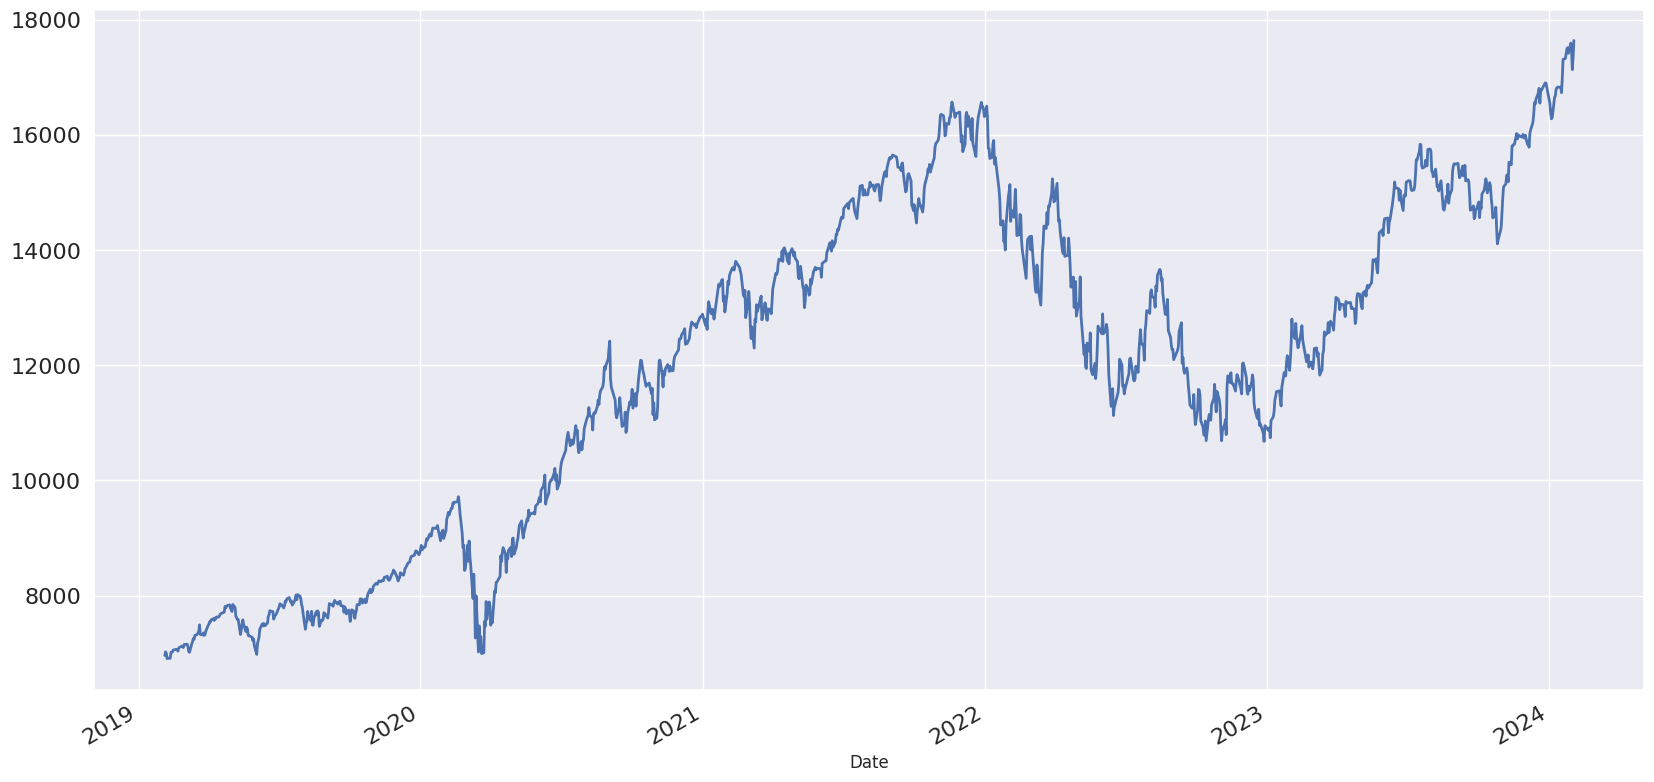

In [219]:
predictorprices_final["Nasdaq_100_Price"].plot(figsize=(20,10), linewidth=2, fontsize=16)

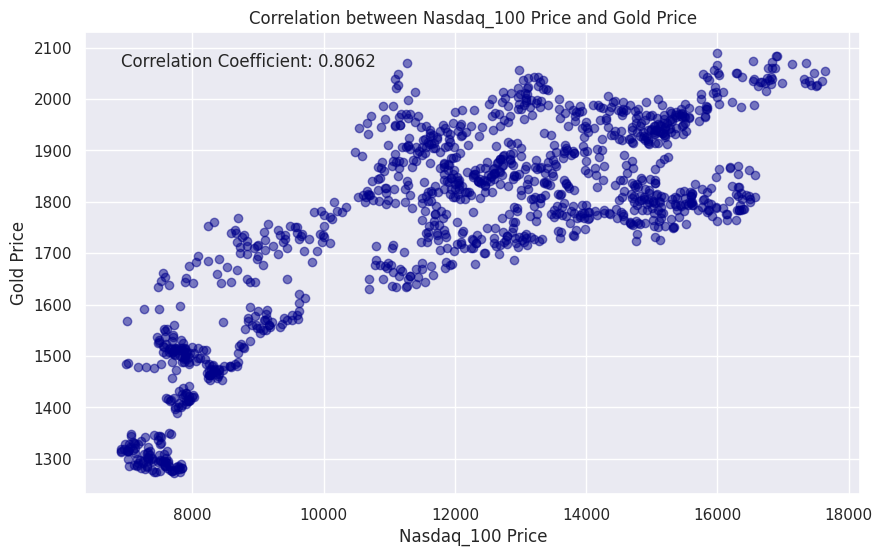

In [220]:
# Calculate correlation coefficient
corr_coefficient = predictorprices_final['Nasdaq_100_Price'].corr(predictorprices_final['Gold_Price'])
plt.figure(figsize=(10, 6))
plt.scatter(predictorprices_final['Nasdaq_100_Price'], predictorprices_final['Gold_Price'], color='darkblue', alpha=0.5)
plt.title('Correlation between Nasdaq_100 Price and Gold Price')
plt.xlabel('Nasdaq_100 Price')
plt.ylabel('Gold Price')
plt.text(predictorprices_final['Nasdaq_100_Price'].min(), predictorprices_final['Gold_Price'].max(), f'Correlation Coefficient: {corr_coefficient:.4f}', verticalalignment='top')
plt.grid(True)
plt.show()




**Apple_Price**

<Axes: xlabel='Date'>

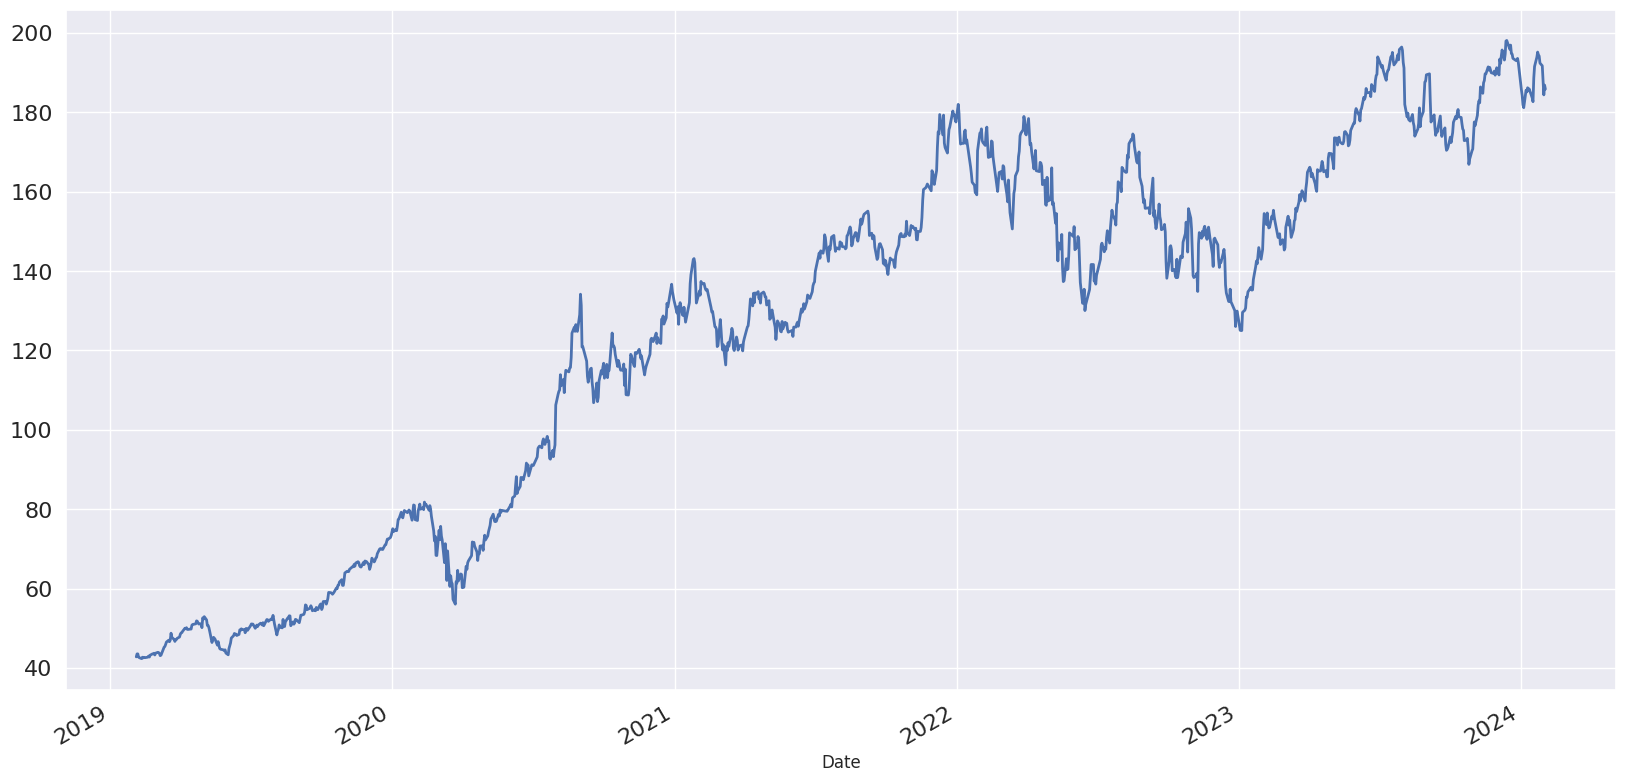

In [221]:
predictorprices_final["Apple_Price"].plot(figsize=(20,10), linewidth=2, fontsize=16)

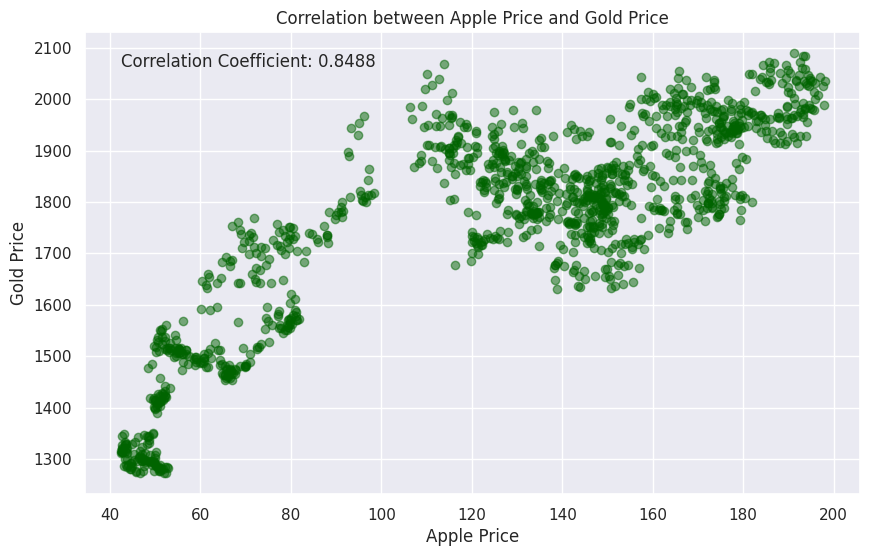

In [222]:
# Calculate correlation coefficient
corr_coefficient = predictorprices_final['Apple_Price'].corr(predictorprices_final['Gold_Price'])
plt.figure(figsize=(10, 6))
plt.scatter(predictorprices_final['Apple_Price'], predictorprices_final['Gold_Price'], color='darkgreen', alpha=0.5)
plt.title('Correlation between Apple Price and Gold Price')
plt.xlabel('Apple Price')
plt.ylabel('Gold Price')
plt.text(predictorprices_final['Apple_Price'].min(), predictorprices_final['Gold_Price'].max(), f'Correlation Coefficient: {corr_coefficient:.4f}', verticalalignment='top')
plt.grid(True)
plt.show()




**Silver_Price**

<Axes: xlabel='Date'>

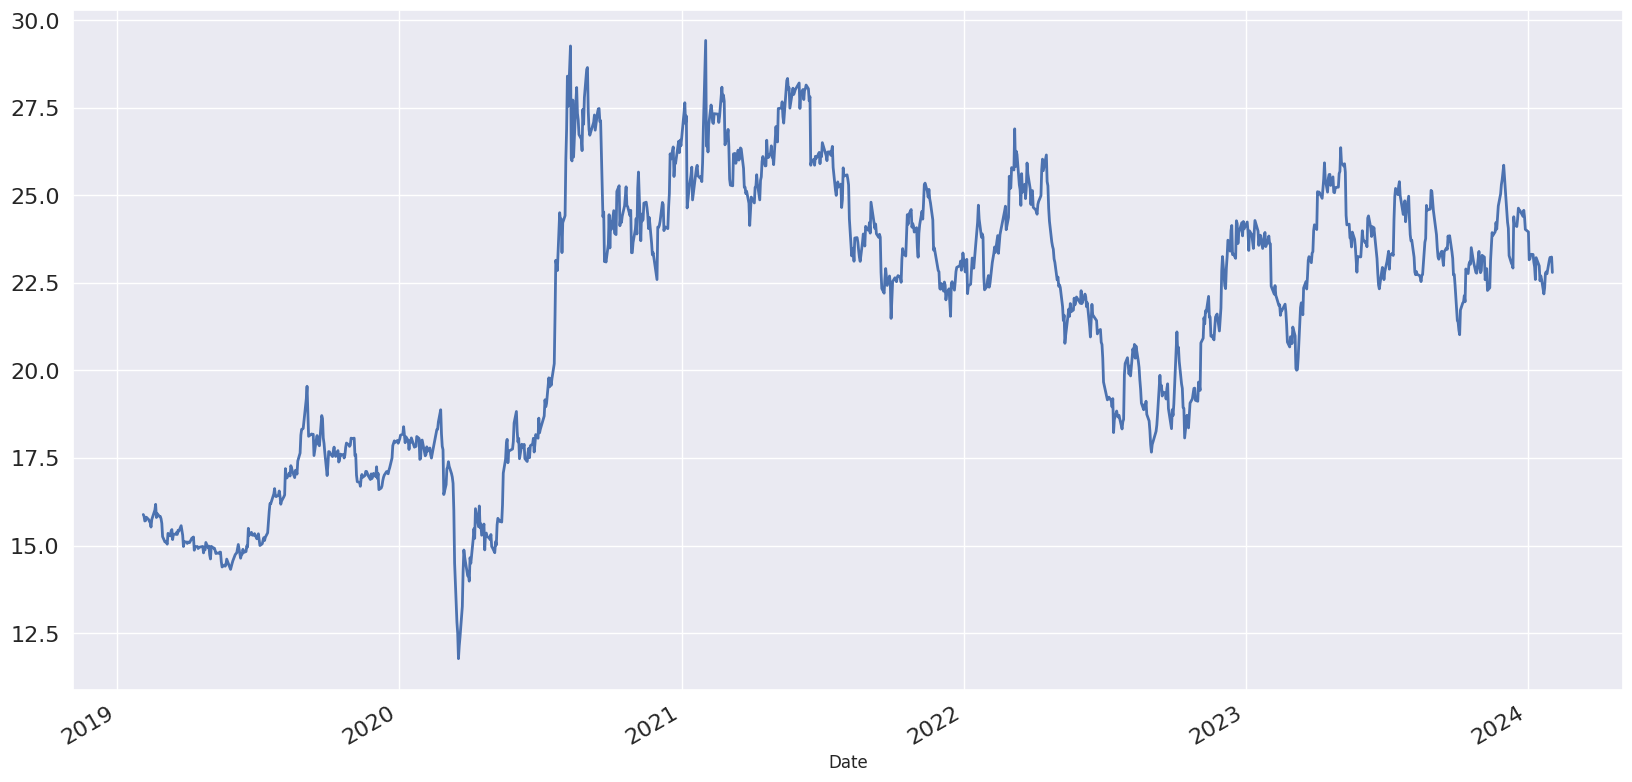

In [223]:
predictorprices_final["Silver_Price"].plot(figsize=(20,10), linewidth=2, fontsize=16)

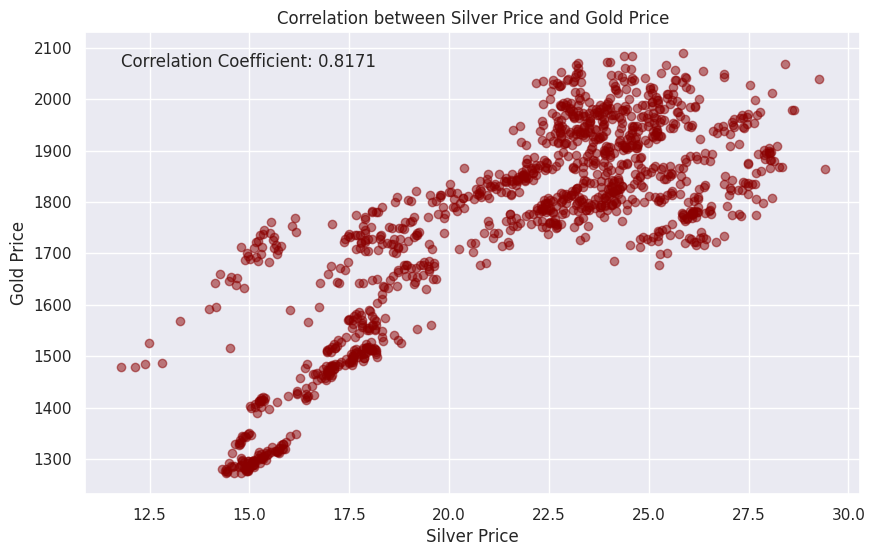

In [224]:
# Calculate correlation coefficient
corr_coefficient = predictorprices_final['Silver_Price'].corr(predictorprices_final['Gold_Price'])
plt.figure(figsize=(10, 6))
plt.scatter(predictorprices_final['Silver_Price'], predictorprices_final['Gold_Price'], color='darkred', alpha=0.5)
plt.title('Correlation between Silver Price and Gold Price')
plt.xlabel('Silver Price')
plt.ylabel('Gold Price')
plt.text(predictorprices_final['Silver_Price'].min(), predictorprices_final['Gold_Price'].max(), f'Correlation Coefficient: {corr_coefficient:.4f}', verticalalignment='top')
plt.grid(True)
plt.show()




## **Machine Learning**

### **1. Linear Regression**

We first perform Linear Regression to compare each of the predictors and help us decide on the most suitable predictor.

* Response Variable : `Gold_Price`
* Predictor Variable : `Nasdaq_100_Price`, `Apple_Price`, `Silver_Price`

### **Uni-Variate Linear Regression**
   
  
> Regression Model : Price = $a\ \ \times\ $Predictor Variable + $b$



Next, we extract the required variables as a Pandas DataFrame apply the Linear Regression ML technique to train the model.

In [225]:
goldprice = pd.DataFrame(predictorprices_final['Gold_Price'])
nasdaq100 = pd.DataFrame(predictorprices_final['Nasdaq_100_Price'])
apple = pd.DataFrame(predictorprices_final['Apple_Price'])
silver = pd.DataFrame(predictorprices_final['Silver_Price'])

### **1. Nasdaq_100_Price vs Gold_Price**

Intercept of Regression 	: b =  [1074.29260561]
Coefficients of Regression 	: a =  [[0.05671053]]



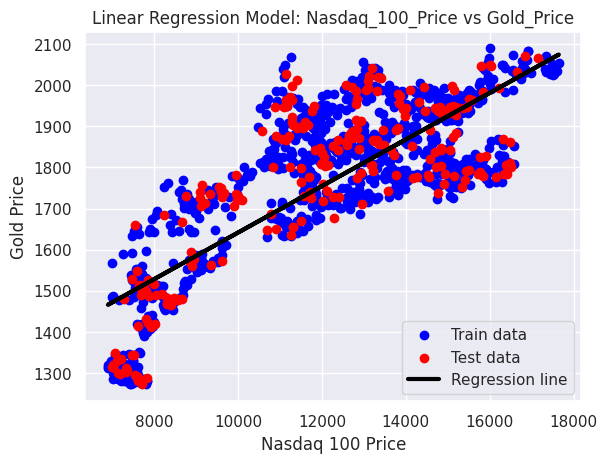


Goodness of Fit Metrics (Train set):
R^2 on Train set: 0.6561344691362083
Mean Squared Error on Train set: 14121.17934273839

Prediction Accuracy Metrics (Test set):
R^2 on Test set: 0.6249975698420803
Mean Squared Error on Test set: 15801.16430601258


In [226]:
# test_size 0.2 such that its a 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(nasdaq100, goldprice, test_size = 0.20)

# Create the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train,y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plotting the Linear Regression line
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X_train, linreg.predict(X_train), color='black', linewidth=3, label='Regression line')
plt.xlabel('Nasdaq 100 Price')
plt.ylabel('Gold Price')
plt.title('Linear Regression Model: Nasdaq_100_Price vs Gold_Price')
plt.legend()
plt.show()

# Compute R^2 and Mean Squared Error for the Train set
train_r_squared = linreg.score(X_train, y_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# Compute R^2 and Mean Squared Error for the Test set
test_r_squared = linreg.score(X_test, y_test)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print the metrics
print()
print("Goodness of Fit Metrics (Train set):")
print("R^2 on Train set:", train_r_squared)
print("Mean Squared Error on Train set:", train_mse)
print("\nPrediction Accuracy Metrics (Test set):")
print("R^2 on Test set:", test_r_squared)
print("Mean Squared Error on Test set:", test_mse)

### **2. Apple_Price vs Gold_Price**

Intercept of Regression 	: b =  [1297.68446525]
Coefficients of Regression 	: a =  [[3.6806378]]



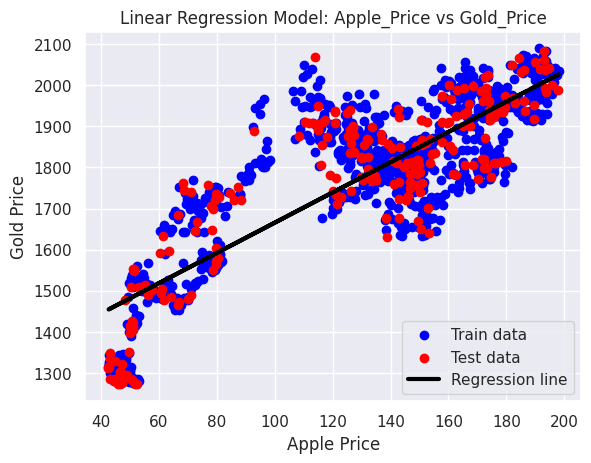


Goodness of Fit Metrics (Train set):
R^2 on Train set: 0.7114325131072741
Mean Squared Error on Train set: 11508.064487779746

Prediction Accuracy Metrics (Test set):
R^2 on Test set: 0.7495468958688507
Mean Squared Error on Test set: 11703.359884106838


In [227]:
# test_size 0.2 such that its a 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(apple, goldprice, test_size = 0.20)

# Create the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train,y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plotting the Linear Regression line
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X_train, linreg.predict(X_train), color='black', linewidth=3, label='Regression line')
plt.xlabel('Apple Price')
plt.ylabel('Gold Price')
plt.title('Linear Regression Model: Apple_Price vs Gold_Price')
plt.legend()
plt.show()

# Compute R^2 and Mean Squared Error for the Train set
train_r_squared = linreg.score(X_train, y_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# Compute R^2 and Mean Squared Error for the Test set
test_r_squared = linreg.score(X_test, y_test)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print the metrics
print()
print("Goodness of Fit Metrics (Train set):")
print("R^2 on Train set:", train_r_squared)
print("Mean Squared Error on Train set:", train_mse)
print("\nPrediction Accuracy Metrics (Test set):")
print("R^2 on Test set:", test_r_squared)
print("Mean Squared Error on Test set:", test_mse)

### **3. Silver_Price vs Gold_Price**

Intercept of Regression 	: b =  [823.01271139]
Coefficients of Regression 	: a =  [[43.42303426]]



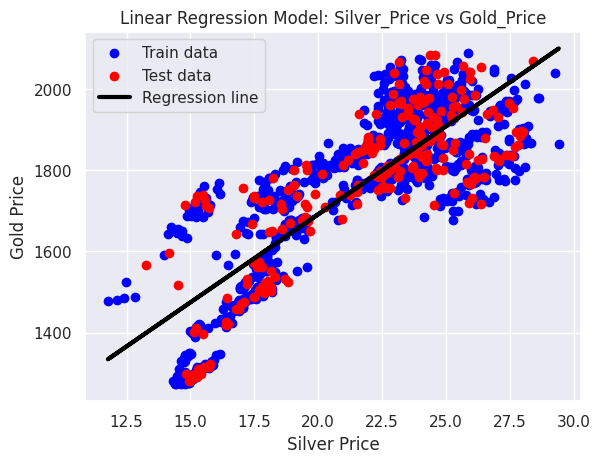


Goodness of Fit Metrics (Train set):
R^2 on Train set: 0.6704656418845341
Mean Squared Error on Train set: 13861.224407809319

Prediction Accuracy Metrics (Test set):
R^2 on Test set: 0.6550195239895384
Mean Squared Error on Test set: 13162.492876458999


In [228]:
# test_size 0.2 such that its a 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(silver, goldprice, test_size = 0.20)

# Create the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train,y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plotting the Linear Regression line
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X_train, linreg.predict(X_train), color='black', linewidth=3, label='Regression line')
plt.xlabel('Silver Price')
plt.ylabel('Gold Price')
plt.title('Linear Regression Model: Silver_Price vs Gold_Price')
plt.legend()
plt.show()

# Compute R^2 and Mean Squared Error for the Train set
train_r_squared = linreg.score(X_train, y_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# Compute R^2 and Mean Squared Error for the Test set
test_r_squared = linreg.score(X_test, y_test)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print the metrics
print()
print("Goodness of Fit Metrics (Train set):")
print("R^2 on Train set:", train_r_squared)
print("Mean Squared Error on Train set:", train_mse)
print("\nPrediction Accuracy Metrics (Test set):")
print("R^2 on Test set:", test_r_squared)
print("Mean Squared Error on Test set:", test_mse)

Based on the results from our Linear Regression model, we choose `Apple_Price` as the best predictor for `Gold_Price` because of the following reasons:

    1.   `Apple_Price` vs `Gold_Price` has the highest Explained Variance (R^2) on test set at 0.7063 (4 d.p.).
    2.   `Apple_Price` vs `Gold_Price` has the lowest Mean Squared Error (MSE) on test set at 11645.3751 (4 d.p.).



Looking back at our correlation matrix, our results from the Linear Regression model support our initial reasoning, which is the higher the correlation, the better the predictor.

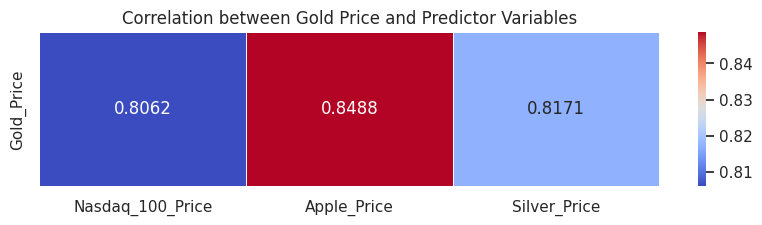

In [229]:
selected_columns = ['Nasdaq_100_Price', 'Apple_Price', 'Silver_Price']
correlation_matrix = predictorprices_final[['Gold_Price'] + selected_columns].corr()
plt.figure(figsize=(10, 2))
sb.heatmap(correlation_matrix.iloc[[0], 1:], annot=True, cmap='coolwarm', linewidths=0.5, fmt=".4f")
plt.title('Correlation between Gold Price and Predictor Variables')
plt.show()

## **2. SARIMA (Seasonal Autoregressive Integrated Moving Average) Model**

Next, we incorporate the SARIMA model, which is the Seasonal Autoregressive Integrated Moving Average model. The Apple_Price can provide additional information and insights that can help the SARIMA model better capture the underlying relationships between the gold market and nasdaq markets. This can then improve the accuracy of predicting future gold prices.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

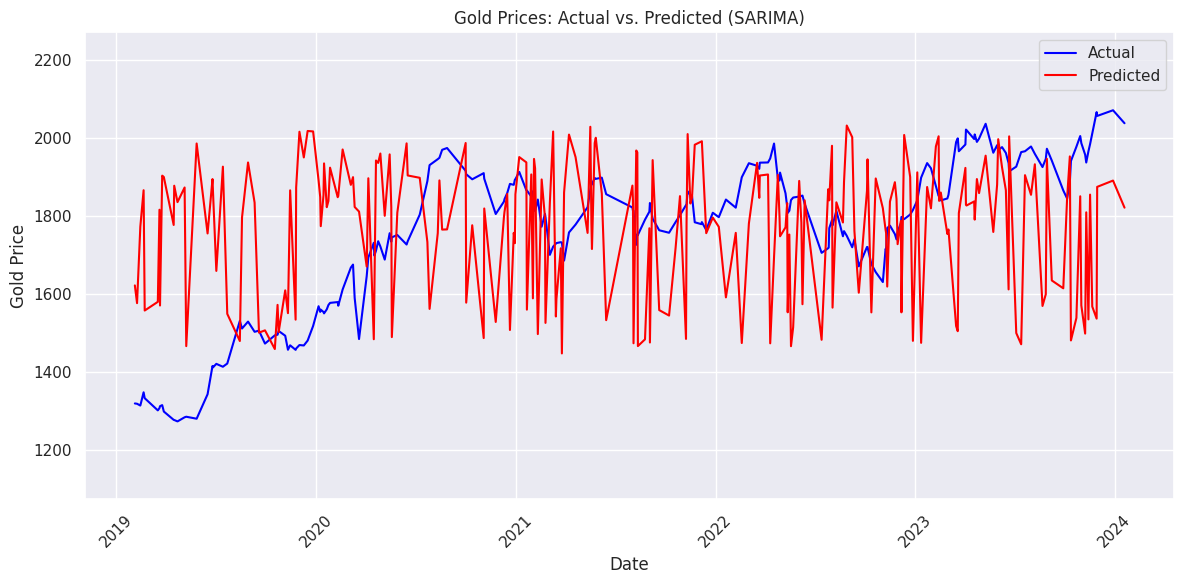

In [230]:
# Extract selected columns for modeling
selected_columns = ['Apple_Price', 'Gold_Price']  # Selecting Apple_Price and Gold_Price
selected_data = predictorprices_final[selected_columns]

# Split selected data into training and testing sets in a ratio of 80:20
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(selected_data.drop(columns=['Gold_Price']), selected_data['Gold_Price'], test_size=0.2, random_state=42)

# Define SARIMA parameters
order = (1, 1, 1)  # Non-seasonal ARIMA parameters (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Seasonal ARIMA parameters (P, D, Q, S)

# Fit SARIMA model
sarima_model = SARIMAX(y_train_selected, exog=X_train_selected, order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()

# Forecast
forecast = sarima_fit.forecast(steps=len(X_test_selected), exog=X_test_selected)

# Sort the test data by date
y_test_selected_sorted = y_test_selected.sort_index()
forecast_sorted = forecast.sort_index()

# Plot actual vs. predicted
plt.figure(figsize=(12, 6))  # Increase the size of the plot
plt.plot(y_test_selected_sorted.index, y_test_selected_sorted, color='blue', label='Actual')
plt.plot(y_test_selected_sorted.index, forecast_sorted, color='red', label='Predicted')
plt.title('Gold Prices: Actual vs. Predicted (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(bottom=min(y_test_selected_sorted.min(), forecast_sorted.min()) - 200, top=max(y_test_selected_sorted.max(), forecast_sorted.max()) + 200)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Analyse Accuracy of SARIMA Model

In [231]:
# Convert forecast index to match y_test_selected index
forecast.index = y_test_selected.index

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_selected, forecast)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_selected, forecast)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_selected - forecast) / np.maximum(np.abs(y_test_selected), 1))) * 100
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Squared Error (MSE): 10749.5938639573
Mean Absolute Error (MAE): 82.98193792918983
Mean Absolute Percentage Error (MAPE): 4.893608681989122


The analysis of our SARIMA model show that `Apple_Price` is indeed a good predictor of `Gold_Price`, although the predicted line does not exactly coincide with the actual price line of Gold. This can be attributed to a few reasons.

  *   There was a part where the predicted line is pretty far off the actual price line, which is around 2019-2020. This might be due to the COVID-19 pandemic which caused all asset prices to dip suddenly, hence this period can be considered as an outlier, and not to be taken with too much weight.
  *   Although the actual and predicted lines do not coincide, but the fluctuations are within an acceptable range, which would still be helpful in predicting the overall trend.



## **3. Random Forest Classification**

We want classify whether to buy gold based on basic general trend of `Apple_Price`. We do this using the Random Forest Classification Technique. If `Apple_Price` increases for 2 days consecutively, we will classify as 'Buy', and vice versa.

In [232]:
# Calculate if Apple_Price have increased for the last 2 days consecutively
predictorprices_final['Apple_Higher_2days'] = ((predictorprices_final['Apple_Price'] > predictorprices_final['Apple_Price'].shift(1)) &
                                               (predictorprices_final['Apple_Price'].shift(1) > predictorprices_final['Apple_Price'].shift(2))).astype(int)

# Combine conditions to decide whether to buy gold or not
predictorprices_final['Buy_or_Not'] = np.where(predictorprices_final['Apple_Higher_2days'] == 1, 1, 0)

# Features for classification
X = predictorprices_final[['Apple_Price']]
y = predictorprices_final['Buy_or_Not']

# Split the data into training and testing sets in a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
predictions = rf_classifier.predict(X_test)



<ipython-input-232-68a237929fcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictorprices_final['Apple_Higher_2days'] = ((predictorprices_final['Apple_Price'] > predictorprices_final['Apple_Price'].shift(1)) &
<ipython-input-232-68a237929fcd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictorprices_final['Buy_or_Not'] = np.where(predictorprices_final['Apple_Higher_2days'] == 1, 1, 0)


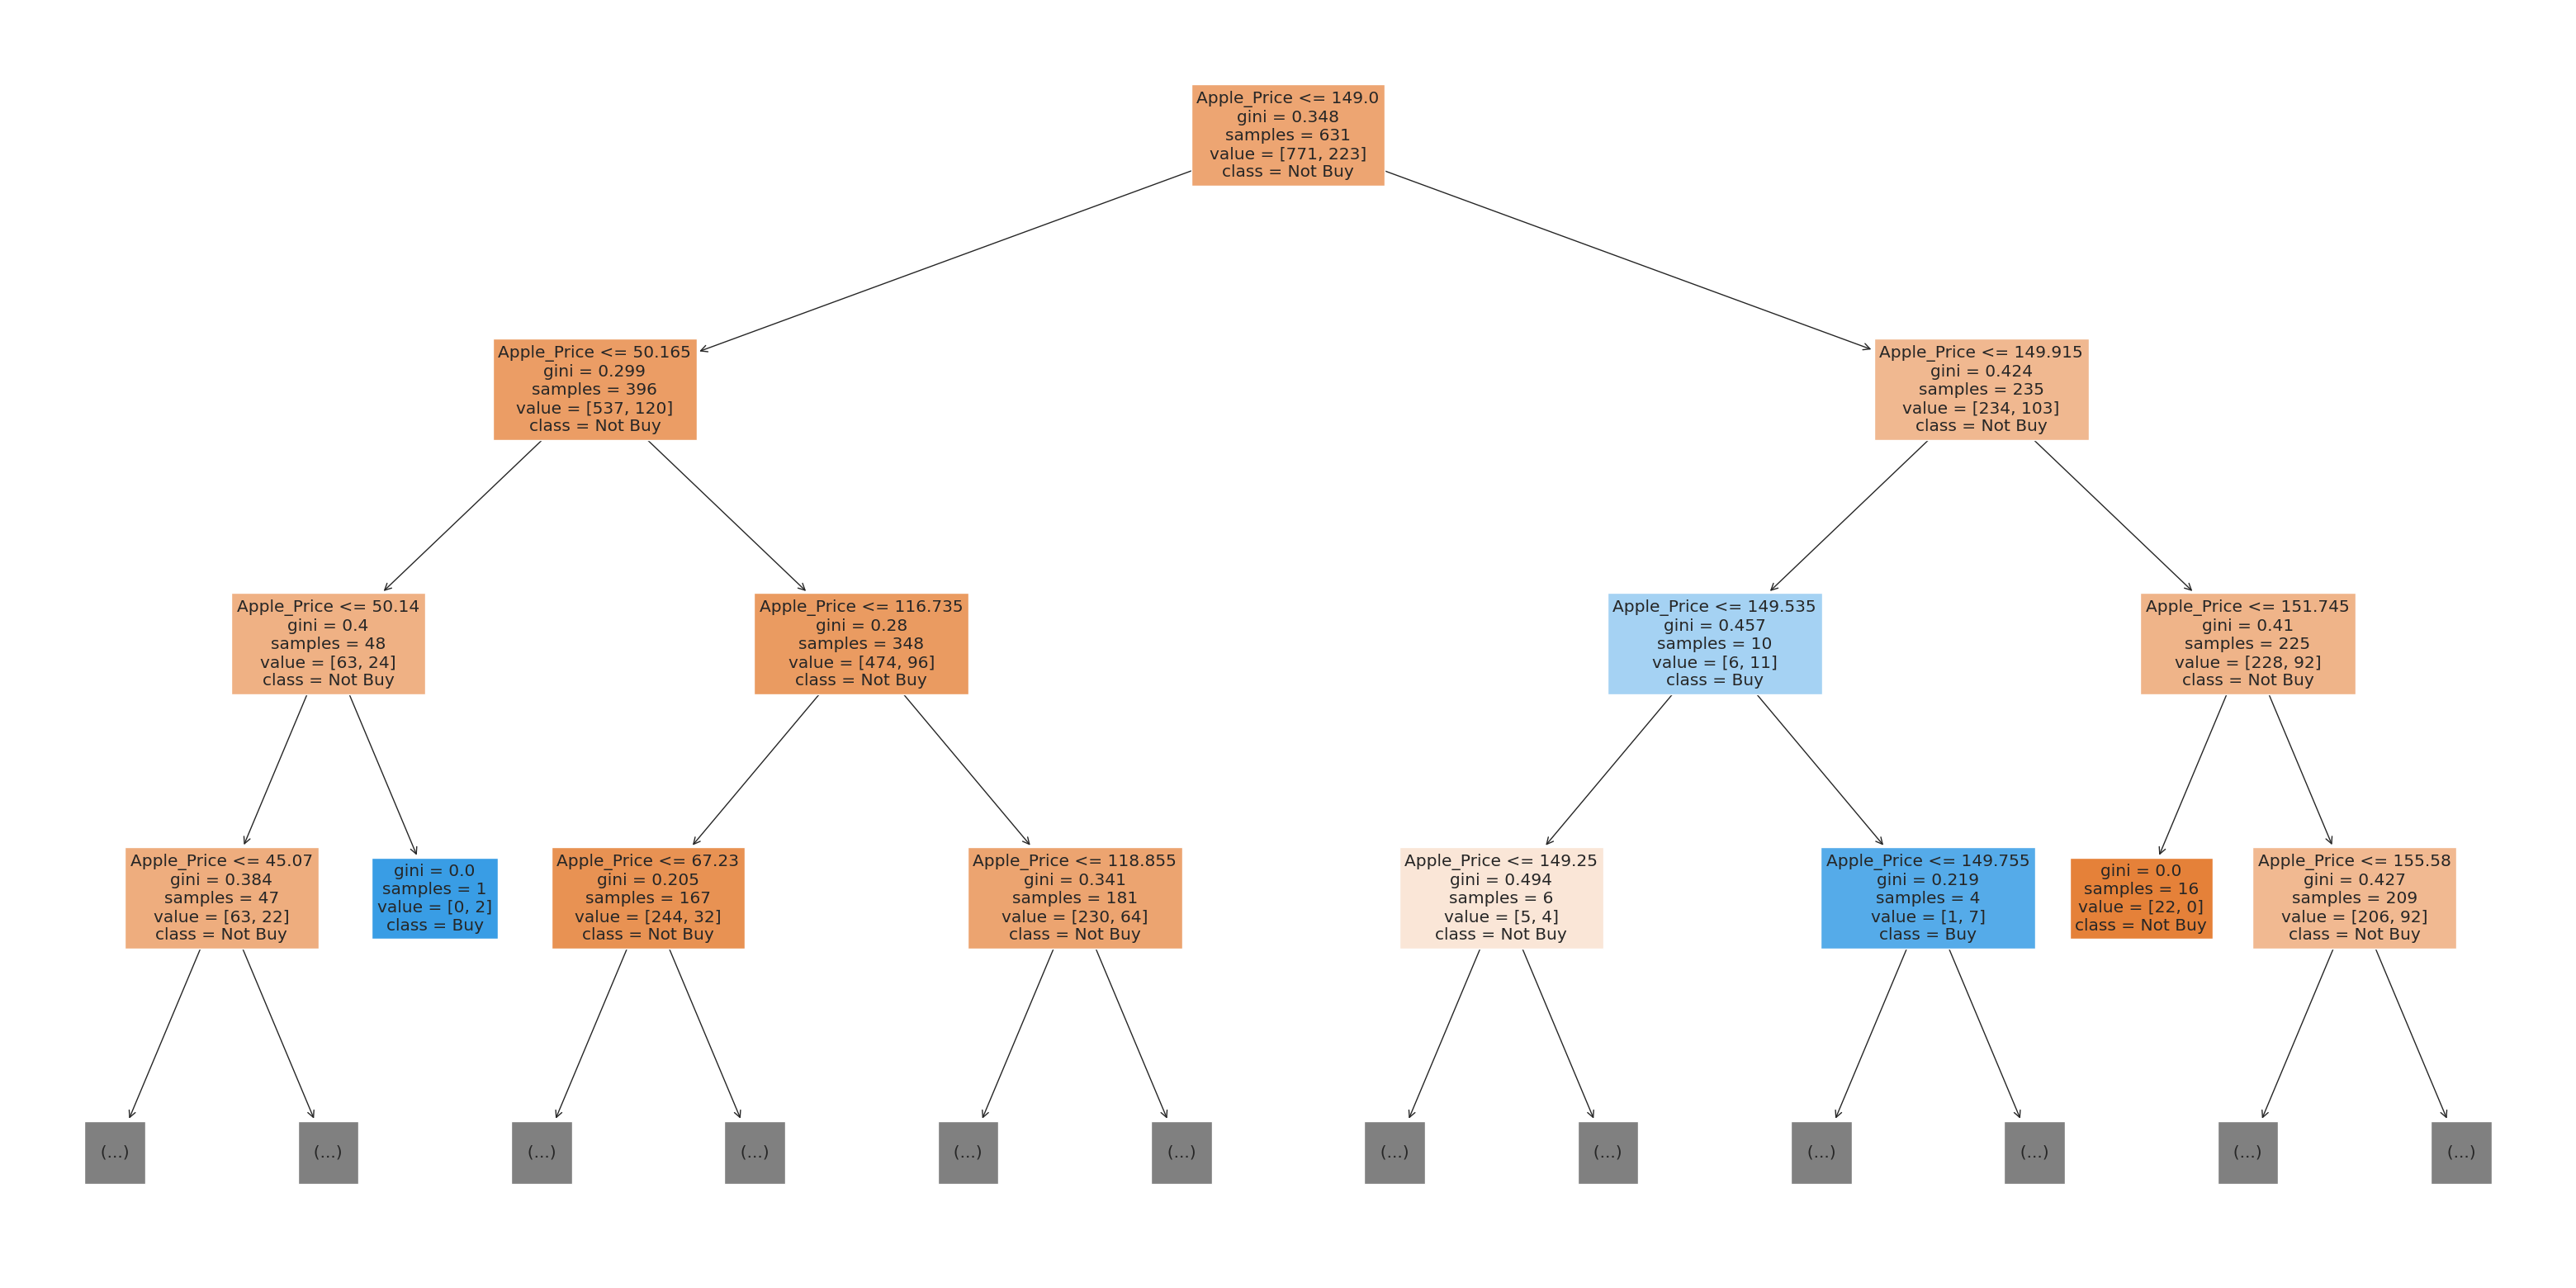

In [233]:
# Sample classification tree
plt.figure(figsize=(40, 20))
plot_tree(rf_classifier.estimators_[0], feature_names=X.columns.tolist(), class_names=['Not Buy', 'Buy'], filled=True, max_depth=3)
plt.show()


Accuracy: 0.6746987951807228
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       202
           1       0.22      0.28      0.24        47

    accuracy                           0.67       249
   macro avg       0.52      0.52      0.52       249
weighted avg       0.71      0.67      0.69       249

Confusion Matrix:
[[155  47]
 [ 34  13]]



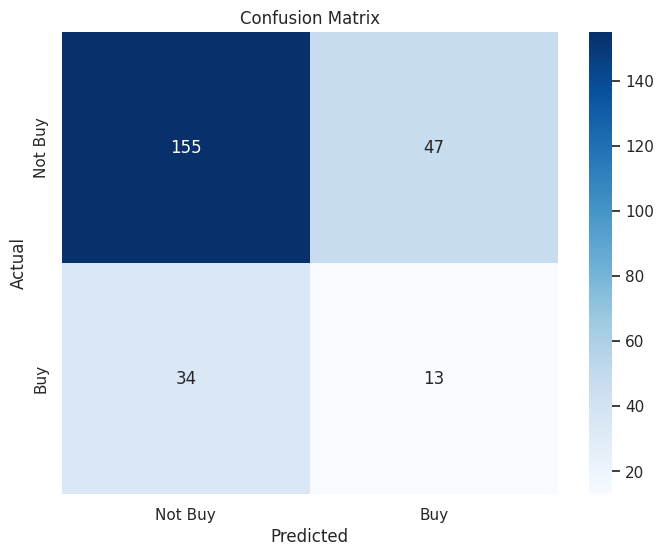

In [238]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)
print()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Buy', 'Buy'], yticklabels=['Not Buy', 'Buy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


From the results, our model achieved an accuracy of 67.5%.     
True Positive Rate (Not Buy correctly classified as Not Buy) = 82.01%.    
True Negative Rate (Buy correctly classified as Buy) = 21.67%.    
False Positive Rate (Buy classified as Not Buy) = 78.33%.   
False Negative Rate (Not Buy classified as Buy) = 17.99%




## **Conclusion**

Overall, our model is particularly good at predicting when to not enter the market to buy gold, evident by the high True Positive Rate and low False Negative Rate. Hence, our model will prove helpful to risk-averse investors.